In [68]:
import numpy as np
import pandas as pd

In [69]:
df = pd.read_csv('spam.csv', encoding='cp1252')

In [70]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
789,ham,Gud mrng dear hav a nice day,NaN,NaN,NaN
3788,ham,Are you sure you don't mean \get here,"we made you hold all the weed\""""",NaN,NaN
2481,ham,K.:)do it at evening da:)urgent:),NaN,NaN,NaN
1913,ham,You want to go?,NaN,NaN,NaN
1507,ham,"Wen ur lovable bcums angry wid u, dnt take it ...",NaN,NaN,NaN


In [71]:
df.shape

(5572, 5)

## 1. Data cleaning

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [73]:
#deleting useless columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True )

In [74]:
df.sample(5)

,v1,v2
4659,ham,You call him and tell now infront of them. Cal...
1223,ham,Rofl betta invest in some anti aging products
4946,spam,Great News! Call FREEFONE 08006344447 to claim...
994,ham,"I can't, I don't have her number!"
2081,ham,I'm aight. Wat's happening on your side.


In [75]:
#enaming columns for clarity of information
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
843,spam,Urgent! call 09066350750 from your landline. Y...
3645,ham,Carlos says we can pick up from him later so y...
672,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...
2832,spam,You've won tkts to the EURO2004 CUP FINAL or å...
1838,spam,Hack Chat. Get backdoor entry into 121 chat ro...


In [76]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [77]:
#converting ham and spam inputs into binary values
df['target'] = encoder.fit_transform(df['target'])

In [78]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
#checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [80]:
#checking for duplicates
df.duplicated().sum()

403

In [81]:
#removing duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [82]:
df.shape

(5169, 2)

## 2. EDA

In [83]:
#checking the ratio of ham and spam
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e654394380>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

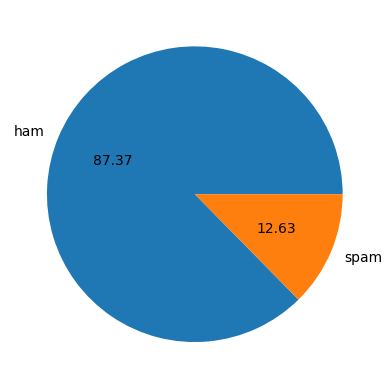

In [84]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct= '%.2f')

In [85]:
#imbalanced data

In [86]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sparsh
[nltk_data]     Barse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
#making a new column to display the number of characters in the values of the text column
df['num_char'] = df['text'].apply(len)

In [88]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [89]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [90]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [91]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [92]:
#ham
df[df['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [93]:
#spam
df[df['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [94]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

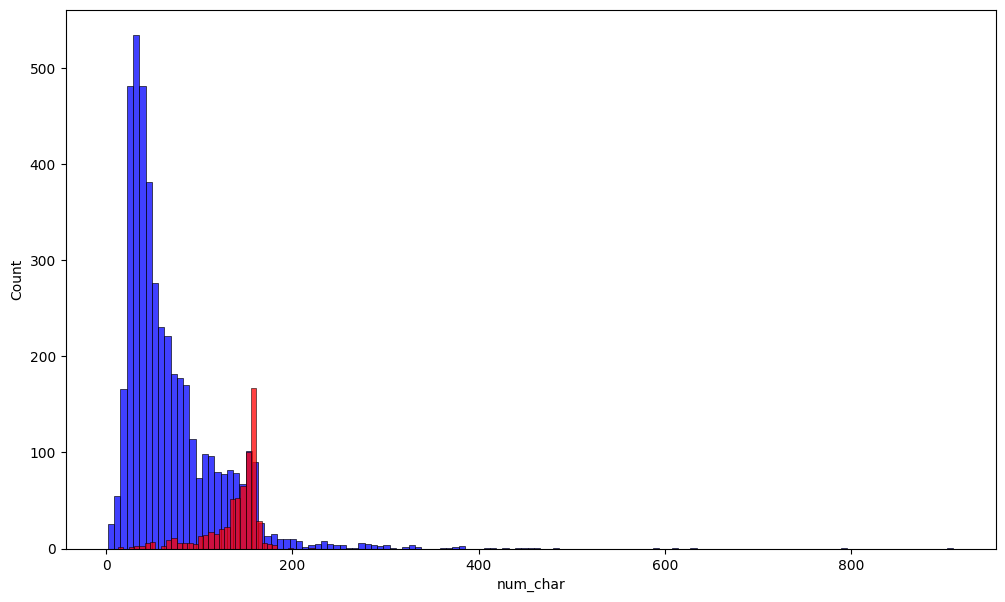

In [95]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target'] == 0]['num_char'], color = 'blue')
sns.histplot(df[df['target'] == 1]['num_char'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

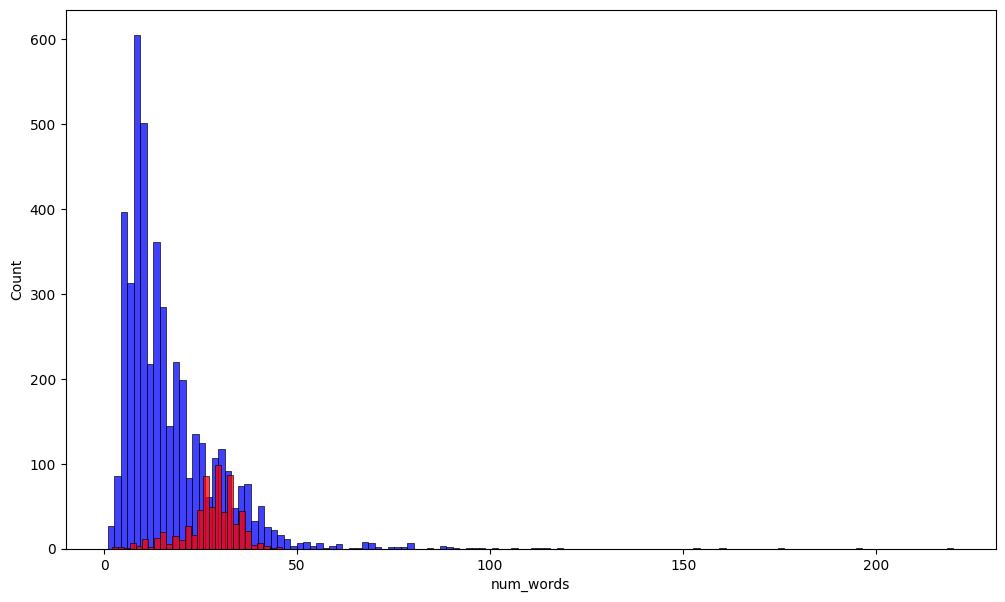

In [96]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target'] == 0]['num_words'], color = 'blue')
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

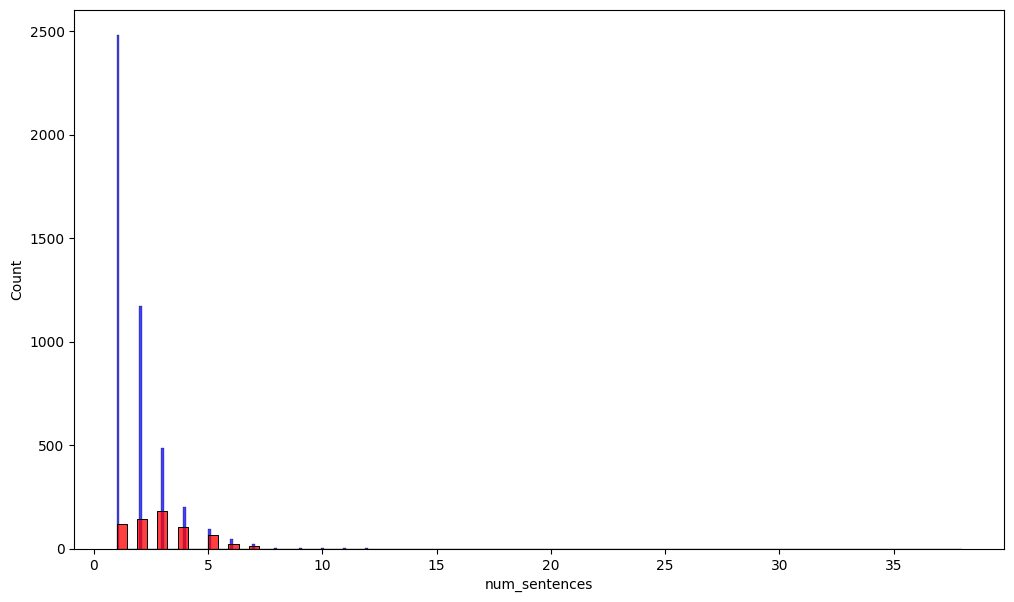

In [97]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target'] == 0]['num_sentences'], color = 'blue')
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')

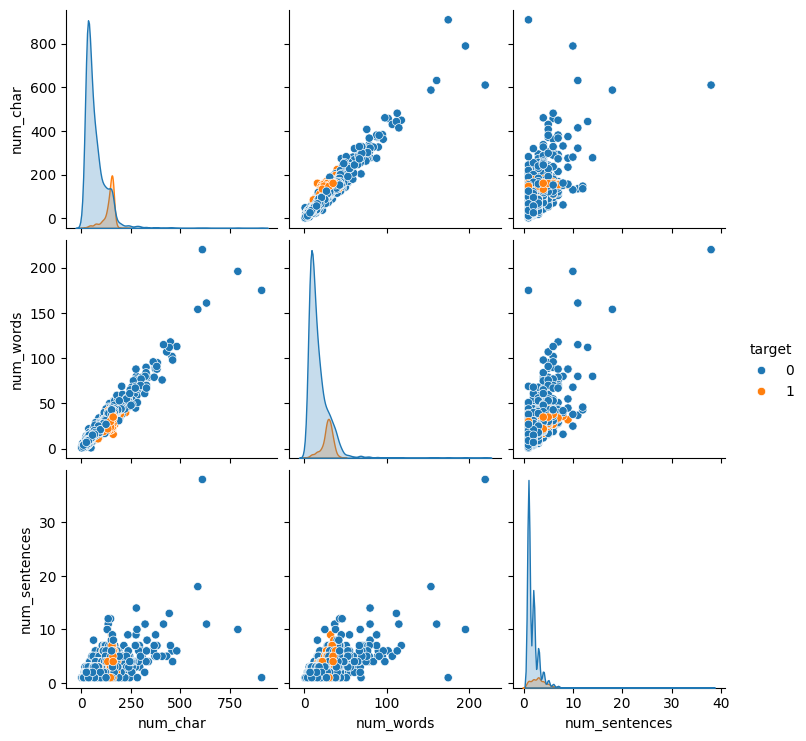

In [98]:
sns.pairplot(df, hue='target')

<Axes: >

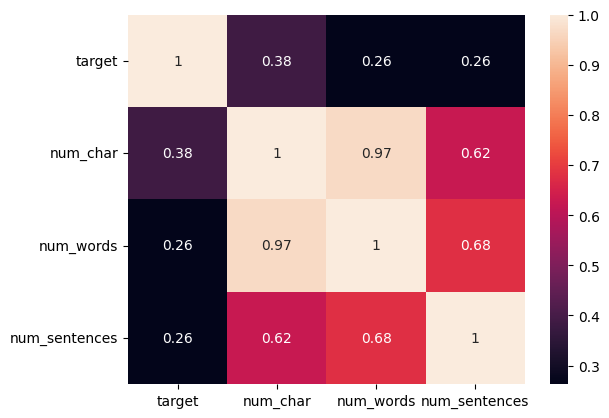

In [99]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## 3. Data Preprocessing

In [100]:
from nltk.corpus import stopwords
import string


In [101]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [102]:
#lowercase
#tokenizing
#removing special characters
#removing punctuation and stop words
#stemming

nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to C:\Users\Sparsh
[nltk_data]     Barse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [104]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [105]:
from collections import Counter

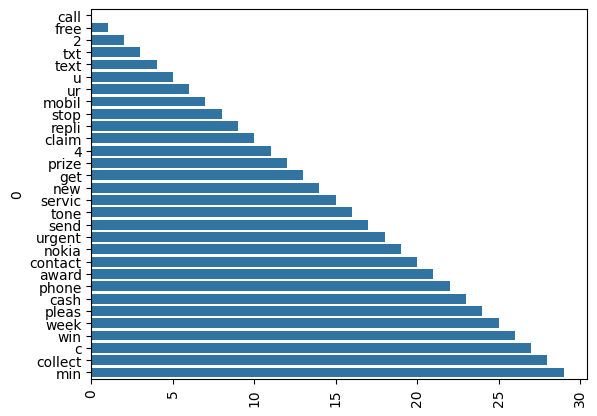

In [106]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation = 'vertical')
plt.show()

In [107]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


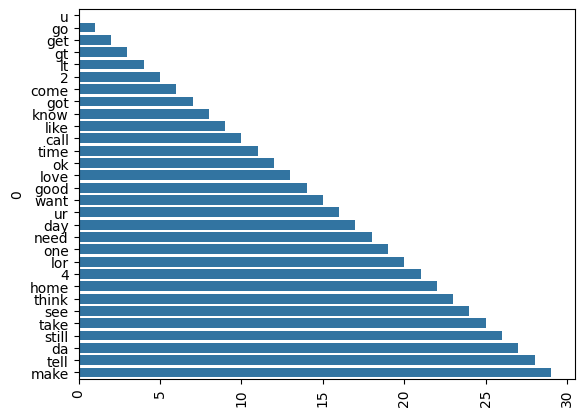

In [108]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building

In [109]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [110]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [111]:
x.shape

(5169, 3000)

In [112]:
y = df['target'].values

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [115]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [116]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [117]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [118]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [119]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [121]:
# tfidf --> mnb

In [123]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))